In [1]:
import numpy as np
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
from transformers_interpret import ImageClassificationExplainer
from PIL import Image

import torch
import torch.nn.functional as F
from torchvision import transforms

from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import LRP
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz
from captum.attr._utils.lrp_rules import EpsilonRule, GammaRule, Alpha1_Beta0_Rule

In [4]:
model_name = "e1010101/vit-384-tongue-image-segmented-augmented"
model = AutoModelForImageClassification.from_pretrained(model_name)
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)

c:\Users\ezrat\anaconda3\envs\Project\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [5]:
transform = transforms.Compose([
    transforms.Resize((384, 384)),
    transforms.ToTensor()
])

In [6]:
image = Image.open("../Samples/segmented/segmented_sample_2.png")
image_transformed = transform(image).unsqueeze(0)

In [7]:
idx_to_labels = {
    0: "Crack",
    1: "Red Dots",
    2: "Toothmark"
}

In [13]:
output = model(image_transformed)
output.logits

tensor([[-3.6275,  3.7757, -3.7763]], grad_fn=<AddmmBackward0>)

In [14]:
output_softmax = F.softmax(output.logits, dim=1)
prediction_score, pred_label_idx = torch.topk(output_softmax, 1)

pred_label_idx.squeeze_()
pred_label_idx.item()

1

In [16]:
predicted_label = idx_to_labels[pred_label_idx.item()]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')

Predicted: Red Dots ( 0.9988670349121094 )


In [17]:
integrated_gradients = IntegratedGradients(model)
attributions_ig = integrated_gradients.attribute(image_transformed, target=pred_label_idx, n_steps=200)

: 

In [ ]:
image_classification_explainer = ImageClassificationExplainer(model=model, feature_extractor=feature_extractor, attribution_type="IGNT")

image_attributions = image_classification_explainer(image_transformed)

print(image_attributions.shape)

(1, 3, 384, 384)


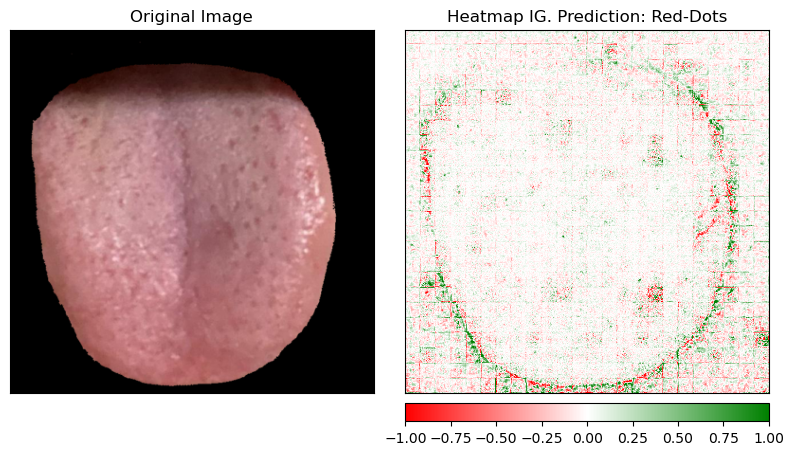

(<Figure size 800x600 with 4 Axes>,
 array([<Axes: title={'center': 'Original Image'}>,
        <Axes: title={'center': 'Heatmap IG. Prediction: Red-Dots'}>],
       dtype=object))

In [20]:
image_classification_explainer.visualize(
    method="heatmap",
    side_by_side=True,
)